In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

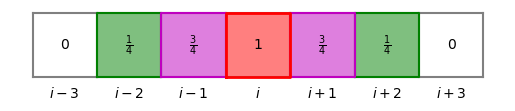

In [2]:
# 1D
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.axis("off")

n_cells = 7
troubled_cells = [3]

x = np.arange(-n_cells, n_cells + 1, 2)

for xi in x:
    # local grid
    plt.plot([xi, xi], [-1, 1], "-", color="grey")
for i in range(n_cells):
    # local grid
    plt.plot([x[i], x[i + 1]], [1, 1], "-", color="grey")
    plt.plot([x[i], x[i + 1]], [-1, -1], "-", color="grey")

# define array of phi
trouble = np.zeros(n_cells)
for i in troubled_cells:
    trouble[i] = 1
phi = trouble.astype("float")
# First neighbors
phi[:-1] = np.maximum(0.75 * trouble[1:], phi[:-1])
phi[1:] = np.maximum(0.75 * trouble[:-1], phi[1:])
# Second neighbors
phi[:-1] = np.maximum(0.25 * (phi[1:] > 0), phi[:-1])
phi[1:] = np.maximum(0.25 * (phi[:-1] > 0), phi[1:])

for i in range(phi.size):
    if phi[i] == 0.25:
        plt.plot([x[i], x[i + 1], x[i + 1], x[i], x[i]], [-1, -1, 1, 1, -1], color="g")
        rect = patches.Rectangle(
            (x[i], -1), 2, 2, linewidth=1, edgecolor="none", facecolor="g", alpha=0.5
        )
        ax.add_patch(rect)
        plt.text(
            x[i] + 1,
            0,
            r"$\frac{1}{4}$",
            horizontalalignment="center",
            verticalalignment="center",
        )
for i in range(phi.size):
    if phi[i] == 0.75:
        plt.plot([x[i], x[i + 1], x[i + 1], x[i], x[i]], [-1, -1, 1, 1, -1], color="m")
        rect = patches.Rectangle(
            (x[i], -1), 2, 2, linewidth=1, edgecolor="none", facecolor="m", alpha=0.5
        )
        ax.add_patch(rect)
        plt.text(
            x[i] + 1,
            0,
            r"$\frac{3}{4}$",
            horizontalalignment="center",
            verticalalignment="center",
        )
for i in range(phi.size):
    if phi[i] == 1:
        plt.plot(
            [x[i], x[i + 1], x[i + 1], x[i], x[i]],
            [-1, -1, 1, 1, -1],
            linewidth=2,
            color="r",
        )
        rect = patches.Rectangle(
            (x[i], -1), 2, 2, linewidth=1, edgecolor="none", facecolor="r", alpha=0.5
        )
        ax.add_patch(rect)
        plt.text(
            x[i] + 1, 0, "1", horizontalalignment="center", verticalalignment="center"
        )
    if phi[i] == 0:
        plt.text(
            x[i] + 1, 0, "0", horizontalalignment="center", verticalalignment="center"
        )

k = n_cells // 2
for i in range(n_cells):
    if i - k < 0:
        string = f"$i - {abs(i - k)}$"
    elif i - k > 0:
        string = f"$i + {i - k}$"
    else:
        string = f"$i$"
    plt.text(
        x[i] + 1, -1.5, string, horizontalalignment="center", verticalalignment="center"
    )

plt.savefig("images/images_convex_blending_1d.png", bbox_inches="tight", dpi=150)

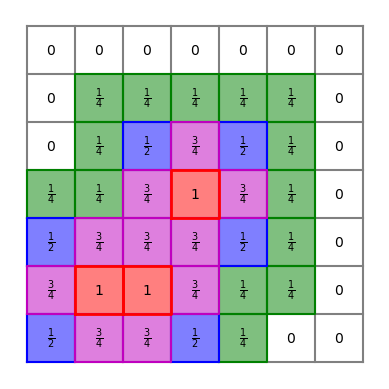

In [4]:
# 2D
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.axis("off")

n_cells = 7
# troubled_cells = [(1,1), (2,1), (3,3)]
troubled_cells = [(3, 3)]

x = np.arange(-n_cells, n_cells + 1, 2)
y = x

for xi in x:
    # local grid
    plt.plot([xi, xi], [-n_cells, n_cells], "-", color="grey")
    plt.plot([-n_cells, n_cells], [xi, xi], "-", color="grey")

# define array of phi
trouble = np.zeros((n_cells, n_cells))
for i, j in troubled_cells:
    trouble[i, j] = 1
phi = trouble.astype("float")
# First neighbors
phi[:, :-1] = np.maximum(0.75 * trouble[:, 1:], phi[:, :-1])
phi[:, 1:] = np.maximum(0.75 * trouble[:, :-1], phi[:, 1:])
phi[:-1, :] = np.maximum(0.75 * trouble[1:, :], phi[:-1, :])
phi[1:, :] = np.maximum(0.75 * trouble[:-1, :], phi[1:, :])
# Second neighbors
phi[:-1, :-1] = np.maximum(0.5 * trouble[1:, 1:], phi[:-1, :-1])
phi[:-1, 1:] = np.maximum(0.5 * trouble[1:, :-1], phi[:-1, 1:])
phi[1:, :-1] = np.maximum(0.5 * trouble[:-1, 1:], phi[1:, :-1])
phi[1:, 1:] = np.maximum(0.5 * trouble[:-1, :-1], phi[1:, 1:])
# Third neighbors
phi[:, :-1] = np.maximum(0.25 * (phi[:, 1:] > 0), phi[:, :-1])
phi[:, 1:] = np.maximum(0.25 * (phi[:, :-1] > 0), phi[:, 1:])
phi[:-1, :] = np.maximum(0.25 * (phi[1:, :] > 0), phi[:-1, :])
phi[1:, :] = np.maximum(0.25 * (phi[:-1, :] > 0), phi[1:, :])

for idx in range(phi.size):
    i = idx // n_cells
    j = idx % n_cells
    if phi[i, j] == 0.25:
        plt.plot(
            [x[i], x[i + 1], x[i + 1], x[i], x[i]],
            [y[j], y[j], y[j + 1], y[j + 1], y[j]],
            color="g",
        )
        rect = patches.Rectangle(
            (x[i], y[j]), 2, 2, linewidth=1, edgecolor="none", facecolor="g", alpha=0.5
        )
        ax.add_patch(rect)
        plt.text(
            x[i] + 1,
            y[j] + 1,
            r"$\frac{1}{4}$",
            horizontalalignment="center",
            verticalalignment="center",
        )
for idx in range(phi.size):
    i = idx // n_cells
    j = idx % n_cells
    if phi[i, j] == 0.5:
        plt.plot(
            [x[i], x[i + 1], x[i + 1], x[i], x[i]],
            [y[j], y[j], y[j + 1], y[j + 1], y[j]],
            color="b",
        )
        rect = patches.Rectangle(
            (x[i], y[j]), 2, 2, linewidth=1, edgecolor="none", facecolor="b", alpha=0.5
        )
        ax.add_patch(rect)
        plt.text(
            x[i] + 1,
            y[j] + 1,
            r"$\frac{1}{2}$",
            horizontalalignment="center",
            verticalalignment="center",
        )
for idx in range(phi.size):
    i = idx // n_cells
    j = idx % n_cells
    if phi[i, j] == 0.75:
        plt.plot(
            [x[i], x[i + 1], x[i + 1], x[i], x[i]],
            [y[j], y[j], y[j + 1], y[j + 1], y[j]],
            color="m",
        )
        rect = patches.Rectangle(
            (x[i], y[j]), 2, 2, linewidth=1, edgecolor="none", facecolor="m", alpha=0.5
        )
        ax.add_patch(rect)
        plt.text(
            x[i] + 1,
            y[j] + 1,
            r"$\frac{3}{4}$",
            horizontalalignment="center",
            verticalalignment="center",
        )
for idx in range(phi.size):
    i = idx // n_cells
    j = idx % n_cells
    if phi[i, j] == 1:
        plt.plot(
            [x[i], x[i + 1], x[i + 1], x[i], x[i]],
            [y[j], y[j], y[j + 1], y[j + 1], y[j]],
            linewidth=2,
            color="r",
        )
        rect = patches.Rectangle(
            (x[i], y[j]), 2, 2, linewidth=1, edgecolor="none", facecolor="r", alpha=0.5
        )
        ax.add_patch(rect)
        plt.text(
            x[i] + 1,
            y[j] + 1,
            "1",
            horizontalalignment="center",
            verticalalignment="center",
        )
    if phi[i, j] == 0:
        plt.text(
            x[i] + 1,
            y[j] + 1,
            "0",
            horizontalalignment="center",
            verticalalignment="center",
        )

plt.savefig(
    f"images/images_convex_blending_2d_{troubled_cells}.png",
    bbox_inches="tight",
    dpi=150,
)